# Example: Time $\rightarrow$ Freq $\rightarrow$ Time-Domain

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# CZT package
import czt

# SciencePlots, optional
# used for nicer plotting
# https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'notebook'])

# Generate Time-Domain Signal for Example

In [3]:
# Time data
t = np.arange(0, 20e-3, 1e-4)
dt = t[1] - t[0]
Fs = 1 / dt
N = len(t)

print("Sampling period:    {:5.2f} ms".format(dt * 1e3))
print("Sampling frequency: {:5.2f} kHz".format(Fs / 1e3))
print("Nyquist frequency:  {:5.2f} kHz".format(Fs / 2 / 1e3))
print("Number of points:   {:5d}".format(N))

Sampling period:     0.10 ms
Sampling frequency: 10.00 kHz
Nyquist frequency:   5.00 kHz
Number of points:     200


In [4]:
# Signal data
def model1(t):
    """Exponentially decaying sine wave with higher-order distortion."""
    output = (1.0 * np.sin(2 * np.pi * 1e3 * t) + 
              0.3 * np.sin(2 * np.pi * 2.5e3 * t) + 
              0.1 * np.sin(2 * np.pi * 3.5e3 * t)) * np.exp(-1e3 * t)
    return output

def model2(t):
    """Exponentially decaying sine wave without higher-order distortion."""
    output = (1.0 * np.sin(2 * np.pi * 1e3 * t)) * np.exp(-1e3 * t)
    return output

sig = model1(t)

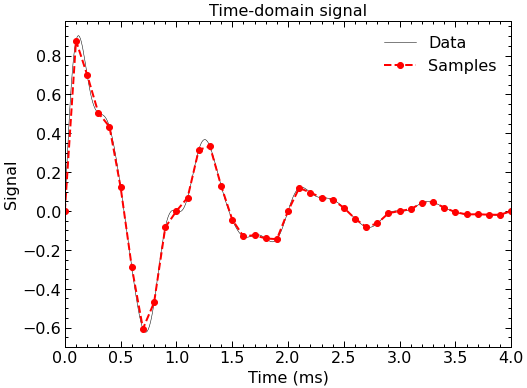

In [5]:
# Plot time-domain data
plt.figure()
t_tmp = np.linspace(0, 6, 601) / 1e3
plt.plot(t_tmp*1e3, model1(t_tmp), 'k', lw=0.5, label='Data')
plt.plot(t*1e3, sig, 'ro--', label='Samples')
plt.xlabel("Time (ms)")
plt.ylabel("Signal")
plt.xlim([0, 4])
plt.legend()
plt.title("Time-domain signal");

# Frequency-domain

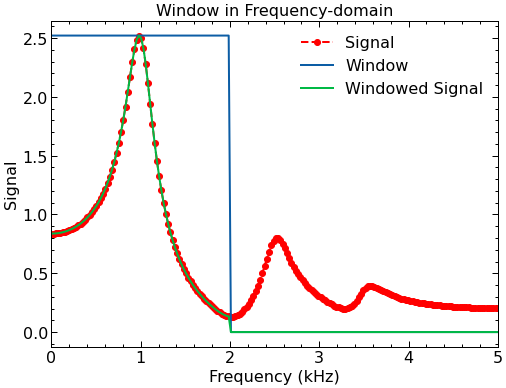

In [6]:
freq = np.linspace(0, 5, len(t)) * 1e3
_, sig_f = czt.time2freq(t, sig, freq)

# Apply window
win_width = 80
window = np.r_[np.ones(win_width), np.zeros(len(freq) - win_width)]
sig_f_windowed = sig_f * window

plt.figure()
plt.plot(freq / 1e3, np.abs(sig_f), 'ro--', label='Signal')
plt.plot(freq / 1e3, window * np.abs(sig_f).max(), label='Window')
plt.plot(freq / 1e3, np.abs(sig_f_windowed), label='Windowed Signal')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Signal")
plt.xlim([freq.min()/1e3, freq.max()/1e3])
plt.legend()
plt.title("Window in Frequency-domain")
plt.savefig("results/windowed-freq-domain.png", dpi=600);

# Time Domain

In [7]:
# Back to time domain
time = np.linspace(0, 5, 51) * 1e-3
time, sig_t          = czt.freq2time(freq, sig_f, time, t_orig=t)
time, sig_t_windowed = czt.freq2time(freq, sig_f_windowed, time, t_orig=t)

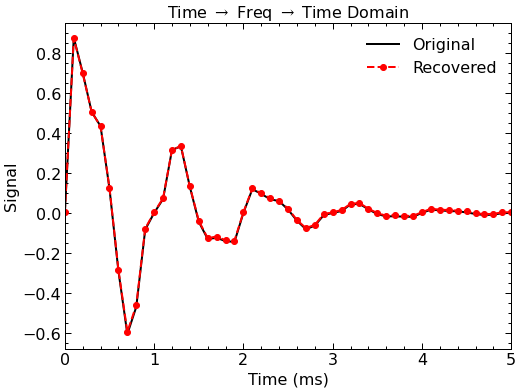

In [8]:
# Plot recovered
plt.figure()
plt.plot(t * 1e3,    sig,                 'k-',   label='Original')
plt.plot(time * 1e3, sig_t.real,          'ro--', label='Recovered')
plt.xlabel("Time (ms)")
plt.ylabel("Signal")
plt.xlim([0, 5])
plt.legend()
plt.title(r"Time $\rightarrow$ Freq $\rightarrow$ Time Domain");

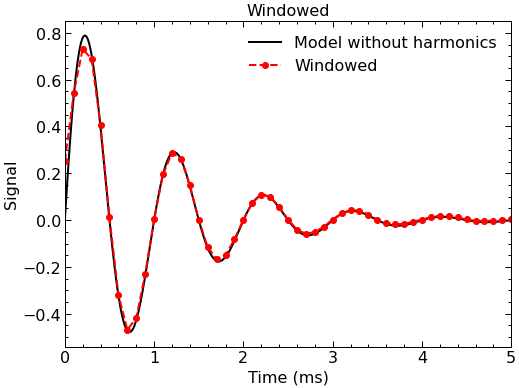

In [9]:
# Plot windowed
plt.figure()
t_tmp = np.linspace(0, 6, 601) / 1e3
plt.plot(t_tmp*1e3, model2(t_tmp), 'k', label='Model without harmonics')
plt.plot(time * 1e3, sig_t_windowed.real, 'ro--', label='Windowed')
plt.xlabel("Time (ms)")
plt.ylabel("Signal")
plt.xlim([0, 5])
plt.legend()
plt.title(r"Windowed");

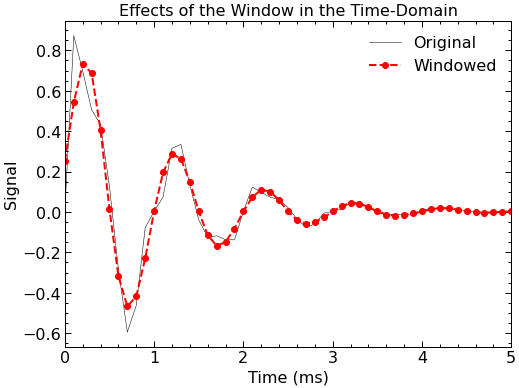

In [10]:
# Plot windowed
plt.figure()
t_tmp = np.linspace(0, 6, 601) / 1e3
plt.plot(time * 1e3, sig_t.real, 'k-', lw=0.5, label='Original')
plt.plot(time * 1e3, sig_t_windowed.real, 'ro--', label='Windowed')
plt.xlabel("Time (ms)")
plt.ylabel("Signal")
plt.xlim([0, 5])
plt.legend()
plt.title("Effects of the Window in the Time-Domain")
plt.savefig("results/windowed-time-domain.png", dpi=600);